In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

In [2]:
# given in the question as known values
kbt0=0.0257
oa0=3.4*kbt0
ob0=1.4*kbt0
oc0=30*kbt0

In [3]:
def g(x1,x2,oa=oa0,ob=ob0,oc=oc0,kbt=kbt0):
#     gibbs free energy g(x1,x2)
    value=oa*x1*(1-x1)+oa*x2*(1-x2)+ob*x1*x2+\
    oc*x1*(1-x1)*x2*(1-x2)+\
    kbt*(x1*log(x1)+(1-x1)*log(1-x1)+x2*log(x2)+(1-x2)*log(1-x2))
    return value

In [4]:
print(g(0.1,0.2))

0.012452025298908355


In [5]:
# grid search x1 in (0,1), x2 in (0,1), find every possible gibbs free energy value
npoints=1001
x1=np.linspace(1e-10,1-1e-10,npoints)
x2=np.linspace(1e-10,1-1e-10,npoints)
X1, X2 = np.meshgrid(x1,x2)
gibbs=np.zeros([npoints,npoints])
# for i in range(len(x1)):
#     for j in range(len(x2)):
#         gibbs[i][j]=g(x1[i],x2[j])
gibbs=np.vectorize(g)(*np.meshgrid(x1,x2))
# print(gibbs)

0.06601542929253597 -0.0013037006315299096


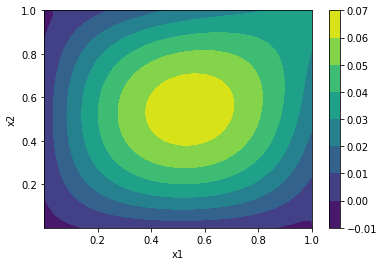

In [6]:
# plot the contour of g(x1,x2)
print(np.max(gibbs),np.min(gibbs))
fig=plt.figure()
contour=plt.contourf(x1,x2,gibbs)
plt.xlabel('x1')
plt.ylabel('x2')
cbar = fig.colorbar(contour)

Text(0, 0.5, 'g/eV')

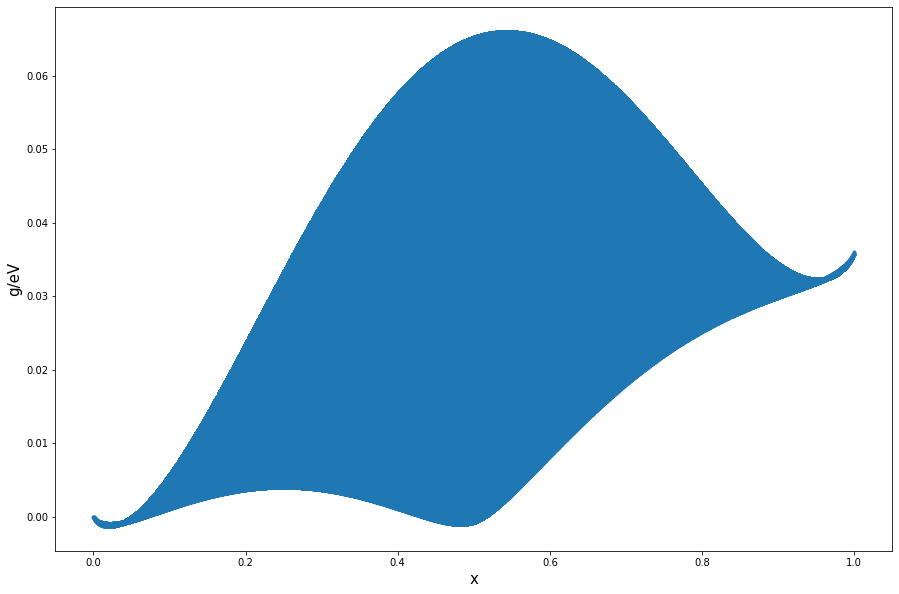

In [7]:
# ensemble plot of g(x) by flattening the contour plot
x=(X1.flatten()/2+X2.flatten()/2)
gibbs_new=gibbs.flatten()
fig=plt.figure(figsize=(15,10))
plt.plot(x,gibbs_new,'.')
plt.xlabel('x',size=15)
plt.ylabel('g/eV',size=15)

In [8]:
# another way of doing the previous cell
# 
# for 2x in (0,2) = x1 + x2, x1,x2 in (0,1),
# change x1 first, and it be in the range of (max(0,2x-1),min(1,2x))
# which could be interpreted by drawing out x1+x2=2x, x1=1, x2=1 in 
# cartesian coordinates
# 
# therefore we can get the gmin and gmax at each x
# brings convenience to later questions
npoints=1001
# x1=np.linspace(1e-10,1-1e-10,npoints)
# x2=np.linspace(1e-10,1-1e-10,npoints)
gibbs_min=[]
gibbs_max=[]
gibbs_x=[]
a=[]
x=np.linspace(0,1,npoints)
for xi in x:
    a=[]
    for x1 in np.linspace(max(0,2*xi-1.0),min(1,2*xi),npoints):
        x2=2*xi-x1
        if(x1>1 or x2>1 or x1<0 or x2<0):
            print(x1,x2,xi)
        if(x1<=1e-10):
            x1=max(x1,1e-10)
        if(x2<=1e-10):
            x2=max(x2,1e-10)
        if(x1>=1-1e-10):
            x1=min(x1,1-1e-10)
        if(x2>=1-1e-10):
            x2=min(x2,1-1e-10)
#         if(x1<=0 or x2<=0):
#             print(x1-0,x2-0,xi)
        a.append(g(x1,x2))
    
    gibbs_min.append(np.min(a))
    gibbs_max.append(np.max(a))
    
# print(len(gibbs_min))
# print(len(gibbs_max))

dataout=np.column_stack((x,gibbs_min,gibbs_max))
np.savetxt('gibbs.dat',dataout,fmt='%8.5f')

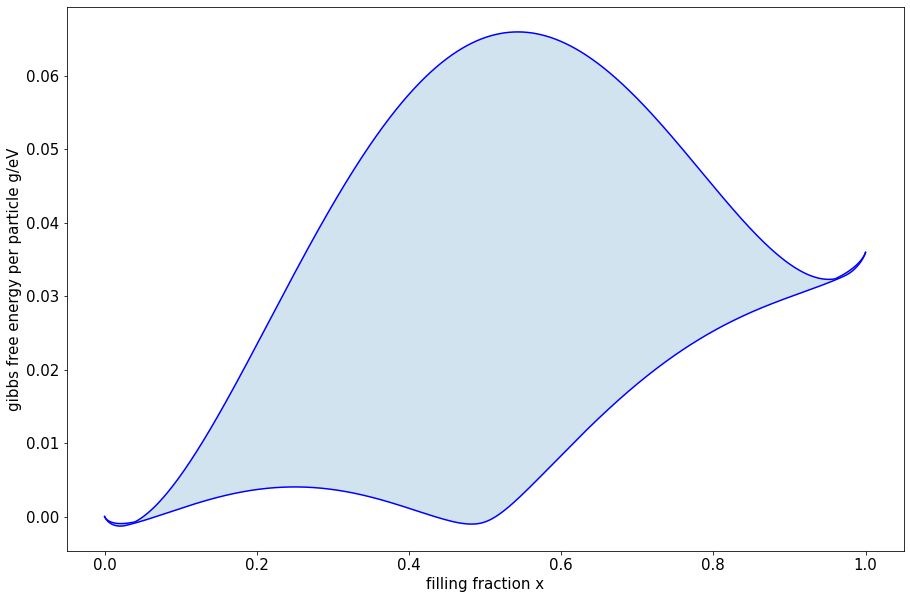

In [9]:
fig=plt.figure(figsize=(15,10))
plt.plot(x,gibbs_min,'b')
plt.plot(x,gibbs_max,'b')
plt.fill_between(x, gibbs_min, gibbs_max, alpha=0.2)
plt.ylabel('gibbs free energy per particle g/eV',size=15)
plt.xlabel('filling fraction x',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Text(0, 0.5, 'minimum gibbs free energy per particle g/eV')

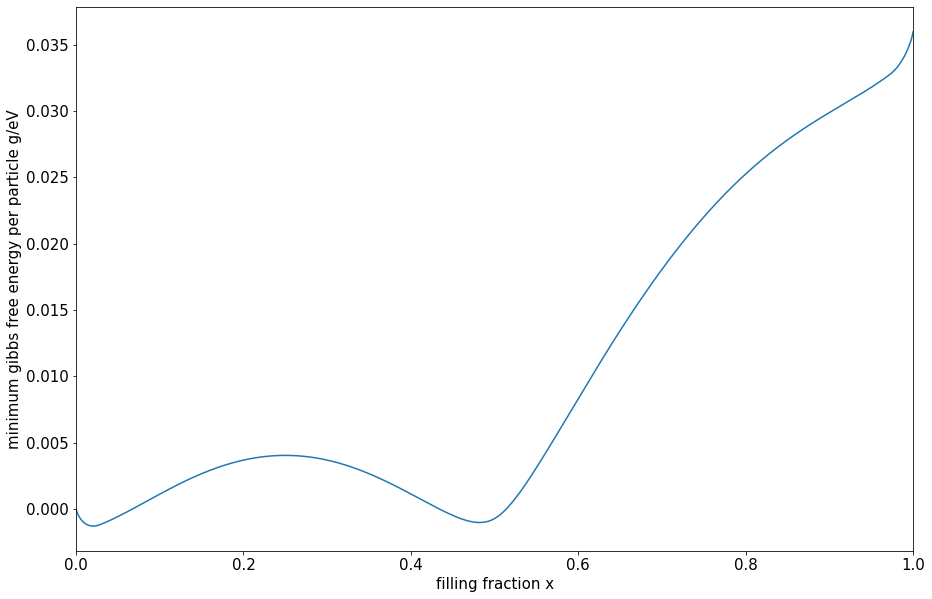

In [10]:
# second law of thermodynamics state that g=gmin
fig=plt.figure(figsize=(15,10))
plt.plot(x,gibbs_min)
plt.xlim([0.0,1.0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('filling fraction x',size=15)
plt.ylabel('minimum gibbs free energy per particle g/eV',size=15)

In [11]:
# mu=dg/dx, use numerical derivative here
mu=[0 for i in range(npoints)]
for i in range(1,1000):
    dx=x[i]-x[i-1]
    dg=(gibbs_min[i+1]-gibbs_min[i-1])/2
    mu[i]=dg/dx
    
mu[-1]=mu[-2]
mu[0]=mu[1]
data=np.column_stack((x,mu))
np.savetxt('mu.dat',data,fmt='%8.5f')

Text(0, 0.5, 'chemical potential mu/eV')

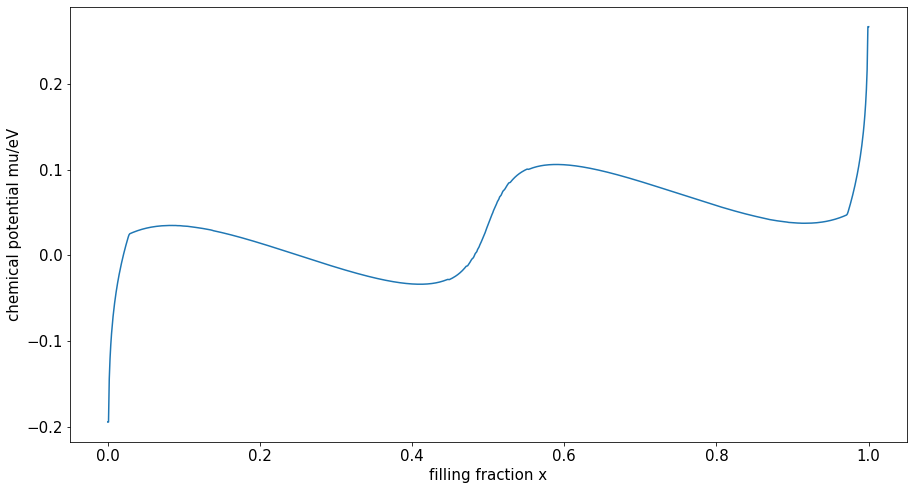

In [12]:
fig=plt.figure(figsize=(15,8))
plt.plot(x,mu)
# plt.xlim([0.1,0.9])
# plt.ylim([-0.05,0.05])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('filling fraction x',size=15)
plt.ylabel('chemical potential mu/eV',size=15)

In [13]:
# for i in range(1,len(mu)-1):
#     if(mu[i]<=mu[i-1] and mu[i]<=miu[i+1]):
#         print(miu[i],x[i])

In [14]:
# import pandas as pd
# df = pd.DataFrame({'Gibbs': gibbs_new,'x':np.around(x,4)})


1001 1001


(0.0, 1.0)

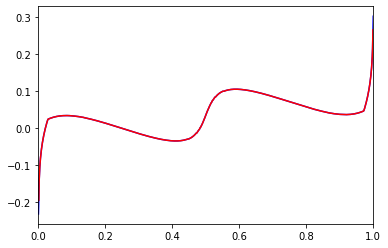

In [15]:
# compare the results of from-scratch numerical derivative and np derivative
# not very differnt
mu1=np.gradient(gibbs_min,x)
print(len(mu1),len(mu))
plt.plot(x,mu1,'b')
plt.plot(x,mu,'r')
plt.xlim([0,1])

In [16]:
# get the intercept of each x with the relationship: g(x)=mu(x)x+b(x)
b=[0 for i in range(len(x))]
for i in range(len(x)):
    b[i]=gibbs_min[i]-mu1[i]*x[i]

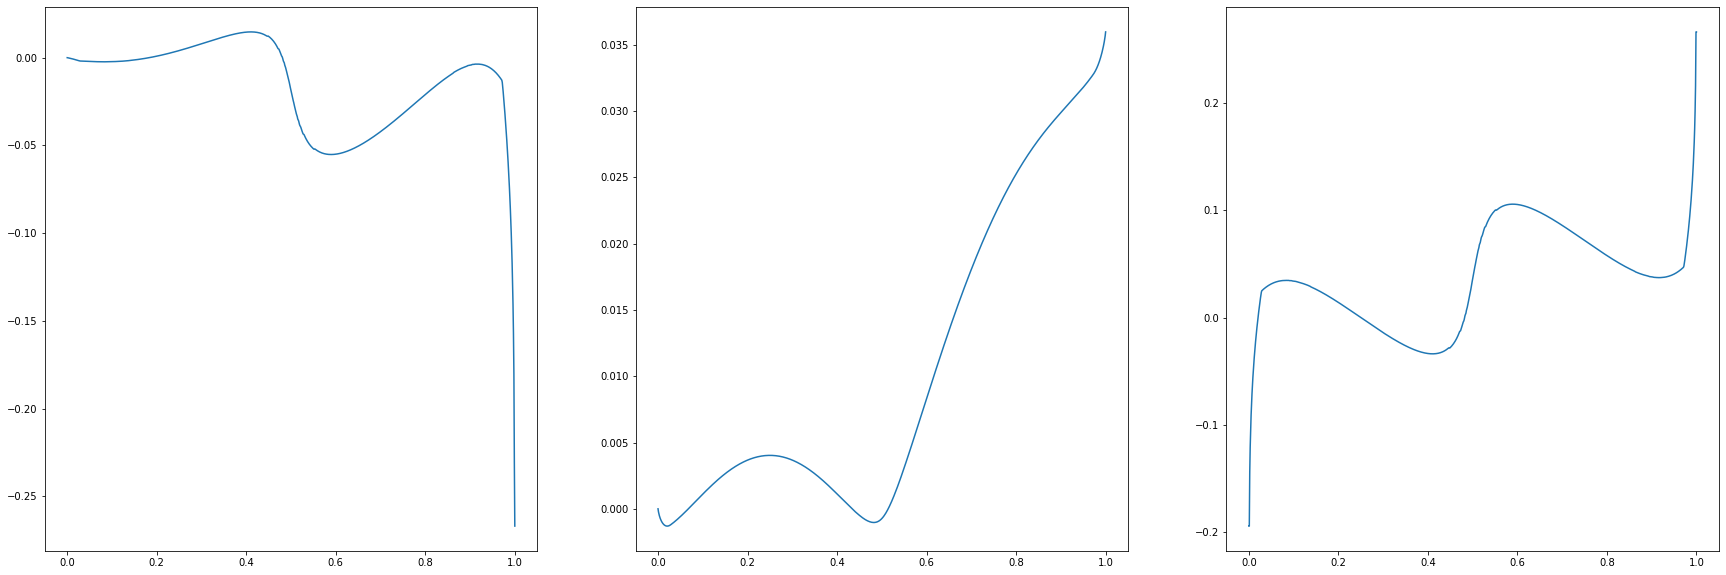

In [17]:
# from left to right b(x), g(x), mu(x)
fig=plt.figure(figsize=[30,10])
plt.subplot(1,3,1)
plt.plot(x,b)
plt.subplot(1,3,2)
plt.plot(x,gibbs_min)
plt.subplot(1,3,3)
plt.plot(x,mu)

In [18]:
# df=pd.DataFrame({'x':x,'g':gibbs_min,'mu':miu,'b':b})
# df1=pd.DataFrame({'mu':np.round(miu,6),'b':np.round(b,6)})

In [19]:
# df[df1.duplicated(subset={'mu','b'})]

In [20]:
# common tangent, find mu(x1)=mu(x2) as well as b(x1)=b(x2)
# I assume this is easier than integrating mu(x)
# especially there are zigzags that make the latter difficult to accomplish
eps=1e-3
x_get_i=[]#this stores the xa values
x_get_j=[]#this stores the xb values
mu_get=[]#this stores the coexistence mu
b_get=[]
for i in range(0,len(x)):
    i=int(i)
    for j in range(i+350,len(x)):
        if(abs(round(mu[i],3)-round(mu[j],3))<eps and abs(b[i]-b[j])<eps):
            x_get_i.append(x[i])
            x_get_j.append(x[j])
            mu_get.append(round((mu[i]+mu[j])/2,3))
            b_get.append(round((b[i]+b[j])/2,3))            
            print(round(x[i],3),round(x[j],3),round((mu[i]+mu[j])/2,3),\
                  round((b[i]+b[j])/2,4))

0.021 0.483 0.002 -0.0016
0.517 0.979 0.07 -0.0358
0.519 0.98 0.074 -0.0386


In [21]:
# print(x_get_i,x_get_j)
# print the coexistence region
xa1=round(x_get_i[0],3)
xa2=round(np.mean([x_get_i[1],x_get_i[2]]),3)

xb1=round(x_get_j[0],3)
xb2=round(np.mean([x_get_j[1],x_get_j[2]]),3)

mu_coex1=mu_get[0]
mu_coex2=np.mean([mu_get[1],mu_get[2]])
print('xa1=',xa1,'xb1=',xb1,'xb1-xa1=',round(xb1-xa1,3),'mu1=',round(mu_coex1,4))
print('xa2=',xa2,'xb2=',xb2,'xb2-xa2=',round(xb2-xa2,3),'mu2=',round(mu_coex2,4))

xa1= 0.021 xb1= 0.483 xb1-xa1= 0.462 mu1= 0.002
xa2= 0.518 xb2= 0.98 xb2-xa2= 0.462 mu2= 0.072


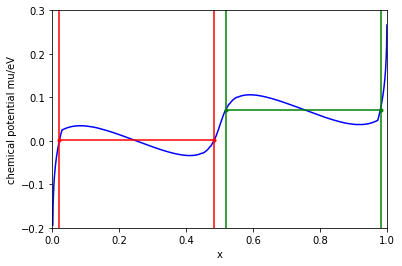

In [22]:
mu1=[mu_coex1 for i in np.linspace(xa1,xb1,100)]
mu2=[mu_coex2 for i in np.linspace(xa2,xb2,100)]

plt.plot(x,mu,'b')
plt.plot(xa1,mu_coex1,'r.')
plt.plot(xb1,mu_coex1,'r.')
plt.plot(xa2,mu_coex2,'g.')
plt.plot(xb2,mu_coex2,'g.')

plt.plot(np.linspace(xa1,xb1,100),mu1,'r')
plt.plot(np.linspace(xa2,xb2,100),mu2,'g')

plt.plot([xa1 for i in np.linspace(-0.3,0.3,100)],np.linspace(-0.3,0.3,100),'r')
plt.plot([xb1 for i in np.linspace(-0.3,0.3,100)],np.linspace(-0.3,0.3,100),'r')
plt.plot([xa2 for i in np.linspace(-0.3,0.3,100)],np.linspace(-0.3,0.3,100),'g')
plt.plot([xb2 for i in np.linspace(-0.3,0.3,100)],np.linspace(-0.3,0.3,100),'g')
plt.ylim([-0.2,0.3])
plt.xlim([0.0,1])
plt.ylabel('chemical potential mu/eV')
plt.xlabel('x')
plt.show()

In [23]:
# make sure that the maxwell construction is satisfied
print(np.trapz(mu[21:483]-(mu[21]+mu[483])/2,x[21:483]))
print(np.trapz(mu[517:979]-(mu[517]+mu[979])/2,x[517:979]))

-0.0005820795381872379
0.0005847811643089392
